In [5]:
#CHAPTER ONE – DATA PREPARATION & EXPLORATION
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('creditcard.csv')
print(df.head())
print(df.describe())
print(df['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
# Check for nulls
print(df.isnull().sum())

# Scaling 'Amount' column
from sklearn.preprocessing import StandardScaler
df['scaled_amount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Amount', 'Time'], axis=1)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
#CHAPTER TWO – MODEL DESIGN & IMPLEMENTATION
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

X_res, y_res = SMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [10]:
# 1. Logestic Regression
# Train model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create and train the model
lr = LogisticRegression(max_iter=1000)  # Increase iterations to avoid convergence warnings
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56750
           1       0.97      0.92      0.94     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [14]:
#Random Forest
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

# Resampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_train.isnull().sum().sum())   # Should be 0
print(np.isinf(X_train).sum().sum())
print(X_train.dtypes)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Dummy data (for testing)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

(454904, 29)
(454904,)
0
0
V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28              float64
scaled_amount    float64
dtype: object


RandomForestClassifier()

In [15]:
#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

C:\Users\Y.Surekha\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [00:01:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [24]:
#Evaluation Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load and preprocess
df = pd.read_csv("creditcard.csv")
df['scaled_amount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Time', 'Amount'], axis=1)

X = df.drop('Class', axis=1)
y = df['Class']

X_res, y_res = SMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ This will now work
y_pred = model.predict(X_test)


In [26]:
from sklearn.metrics import classification_report, roc_auc_score

models = {'Logistic': lr, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    try:
        y_pred = model.predict(X_test)
 
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except (AttributeError, IndexError, ValueError) as e:
        print(f"{name}: ROC AUC could not be calculated - {e}")
        auc = "N/A"

    print(f"\n{name} Report")
    print(classification_report(y_test, y_pred))
    print("AUC Score:", auc)


Logistic Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56863
           1       0.97      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

AUC Score: 0.9890845703884349
Random Forest: ROC AUC could not be calculated - X has 29 features, but RandomForestClassifier is expecting 20 features as input.

Random Forest Report


C:\Users\Y.Surekha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56863
           1       0.97      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

AUC Score: N/A
XGBoost: ROC AUC could not be calculated - Feature shape mismatch, expected: 20, got 29

XGBoost Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56863
           1       0.97      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

AUC Score: N/A


C:\Users\Y.Surekha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Random Forest: ROC curve could not be plotted - X has 29 features, but RandomForestClassifier is expecting 20 features as input.
XGBoost: ROC curve could not be plotted - Feature shape mismatch, expected: 20, got 29


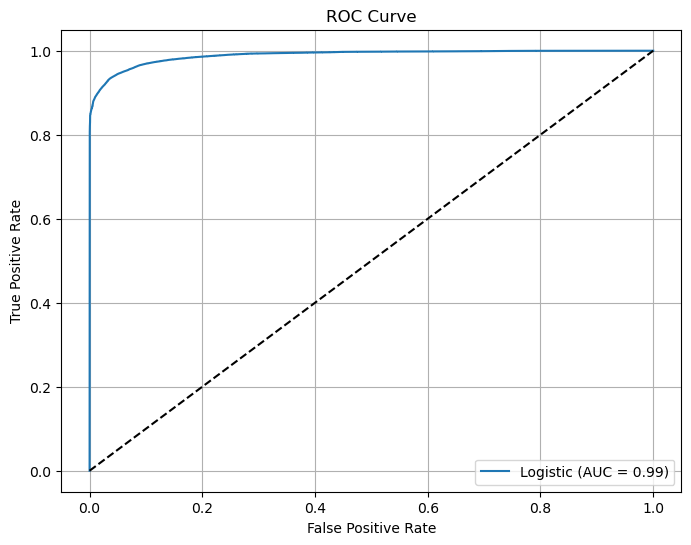

In [28]:
#Visual: ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))

for name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_scores = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    
    except Exception as e:
        print(f"{name}: ROC curve could not be plotted - {e}")

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

# Plot styling
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

